# Tutorial for `sc_drv`

`sc_drv` is a [Python](http://python.org) module that implement the DRV processes developed on top of [Scikit-Criteria](http://scikit-criteria.org).

**Authors**

-   Juan B. Cabral ([IATE-OAC-CONICET](https://iate.oac.uncor.edu),
    [FCEIA-UNR](https://web.fceia.unr.edu.ar/es/)) <jbc.develop@gmail.com>
-   Nadia A. Luczywo ([LIMI-FCEFyN-UNC](http://www.portal.efn.uncor.edu),
    [FCE-UNC](http://www.eco.unc.edu.ar/),
    [SECyT-UNC](https://www.unc.edu.ar/ciencia-y-tecnolog%C3%ADa/))
    <nluczywo@gmail.com>
-   José L. Zanazzi ([LIMI-FCEFyN-UNC](http://www.portal.efn.uncor.edu))
    <jl.zanazzi@gmail.com>


## What is DRV Processes?

DRV processes have been developed to support Group Decision
Making. They are applicable to the cases in which
all members of the group operate in the same organization and, therefore,
they must share organizational values, knowledge and preferences.
Assumes that it is necessary to generate agreement on the preferences of
group members. 

## Tutorial

We are going to reproduce the paper 

> Zanazzi, J. L., Gomes, L. F. A. M., & Dimitroff, M. (2014). Group decision
  making applied to preventive maintenance systems. Pesquisa Operacional,
  34(1), 91-105. [Full Text](https://www.researchgate.net/publication/262372552_Group_decision_making_applied_to_preventive_maintenance_systems).


## Considerations

- Yo need to a basic knowledge aboyt the [Python Programming Language](http://python.org).

> If you’re new to Python, you might want to start by getting an idea of what the language is like. Scikit-
  criteria is 100% Python, so if you’ve got minimal comfort with Python you’ll probably get a lot more out of 
  our project.
>  
> If you’re new to programming entirely, you might want to start with this list of [Python resources for non-
  programmers](https://wiki.python.org/moin/BeginnersGuide/NonProgrammers).
>
> If you already know a few other languages and want to get up to speed with Python quickly, we recommend [Dive 
  Into Python](http://www.diveintopython3.net/). If that’s not quite your style, there are many other [books about Python](https://wiki.python.org/moin/PythonBooks).
>
> At last if you already know Python but check the [Scipy Lecture Notes](http://www.scipy-lectures.org/)

### 1. Installation

The easiest way to install sc_drv is using `pip`

```bash
    $ pip install -U sc-drv
```


If you have not installed NumPy or SciPy yet, you can also install these using
conda or pip. When using pip, please ensure that *binary wheels* are used,
and NumPy and SciPy are not recompiled from source, which can happen when using
particular configurations of operating system and hardware (such as Linux on
a Raspberry Pi).
Building numpy and scipy from source can be complex (especially on Windows) and
requires careful configuration to ensure that they link against an optimized
implementation of linear algebra routines.
Instead, use a third-party distribution as described below.

### 2. Basic Imports

In [7]:
# plotting library
%matplotlib inline
from matplotlib import pyplot as plt

# numerical utilities
import numpy as np

# DRV class
from sc_drv import DRVProcess

### 3. Create the input data.

In [8]:
# Weight Matrix
# - Every row is one participant.
# - Every column is a criteria.
wmtx = [
    [1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0],
    [1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0],
    [1.5, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0],
    [1.5, 2.0, 1.2, 1.5, 1.0, 1.5, 1.0],
    [1.5, 1.5, 1.2, 1.5, 1.2, 1.0, 1.0],
    [2.0, 1.5, 1.0, 1.0, 1.1, 1.0, 1.0]]

In [9]:
# abc = Alternative By Criteria
# - Every mattrix is one criteria .
# - Every row is a participant.
# - Every column is an alternative.
abc = [
    # MO
    [[2.5, 2.0, 1.0],
     [0.5, 3.0, 1.0],
     [2.5, 2.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.0, 4.0, 1.0],
     [6.0, 5.0, 1.0]],

    # COSTO
    [[1.0, 1.0, 1.0],
     [1.0, 1.0, 1.0],
     [3.0, 2.5, 1.0],
     [1.4, 1.3, 1.0],
     [2.5, 2.0, 1.0],
     [0.5, 0.5, 1.0]],

    # EXP
    [[3.0, 2.5, 1.0],
     [2.4, 1.2, 1.0],
     [1.0, 1.0, 1.0],
     [5.0, 4.0, 1.0],
     [1.5, 2.0, 1.0],
     [1.0, 1.0, 1.0]],

    # FLOTA
    [[0.67, 3.0, 1.0],
     [0.9, 2.1, 1.0],
     [1.2, 4.0, 1.0],
     [1.5, 2.0, 1.0],
     [0.9, 4.4, 1.0],
     [1.5, 2.0, 1.0]],

    # MEJ SERV
    [[1.5, 2.0, 1.0],
     [1.0, 2.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.5, 3.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.0, 3.0, 1.0]],

    # HyS
    [[1.5, 4.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.2, 4.0, 1.0],
     [1.1, 3.0, 1.0]],

    # trat
    [[2.0, 1.5, 1.0],
     [1.0, 1.0, 1.0],
     [3.0, 1.0, 1.0],
     [2.0, 1.2, 1.0],
     [4.0, 1.0, 1.0],
     [1.5, 1.1, 1.0]]
]

### 4. Create the decisor-maker object

This object created wiht the class `DRVProcess`, is an experiment configuration. Accepts several parameters like the *consensus limit* (`climit`), the $\alpha$ for normal test (`alpha_norm`) or the normal test (`ntest`) among others.

In [10]:
dec = DRVProcess()
dec

DRVProcess(climit=0.25, ntest='shapiro', ntest_kwargs=None, alpha_norm=0.01, alpha_rank=0.05, njobs=-1, agg_only_consensus=True)

### 5. Run the experiment

The `dec` (Decisor-maker object) has the `decide()` method. The mehod accept as parameters the weigth preference mattrix (`wmtx` in our example) and the list of alternatives-by-criteria matrices (`abc`); and returns a result object.

In [11]:
result = dec.decide(weights=wmtx, abc=abc)

The **result** object print their global status a respresentation

In [12]:
result

Normal Test (ntest),shapiro
Alpha for Normal Test (alpha_norm),0.01
Alpha for T-Test (alpha_rank),0.05
Consensus Limit (climit),0.25
Number of Participants (N_),6
Number of Alternatives (I_),3
Number of Criteria (J_),7
Strict Preference (strict_preference_),False
Consensus (consensus),False
N-Test Reject H0 (ntest_reject_h0_),False
Rank Check (rank_check_results_resume_),False


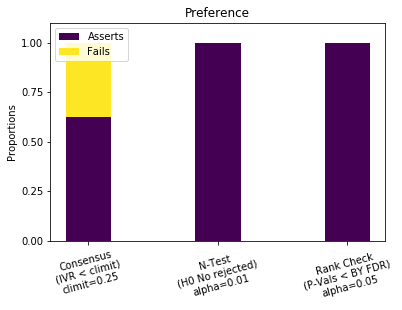

In [17]:
result.plot(cmap="viridis")

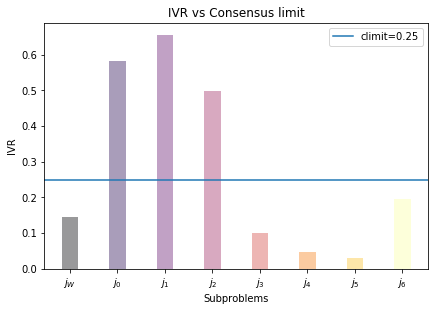

In [17]:
ax = result.plot.ivr(cmap="inferno")

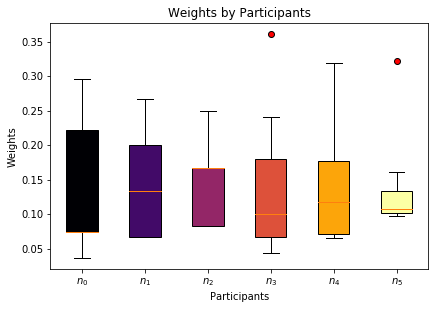

In [18]:
result.plot.weights_by_participants(cmap="inferno")

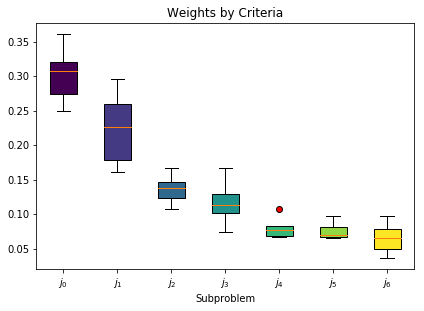

In [19]:
ax = result.plot.weights_by_subproblems()

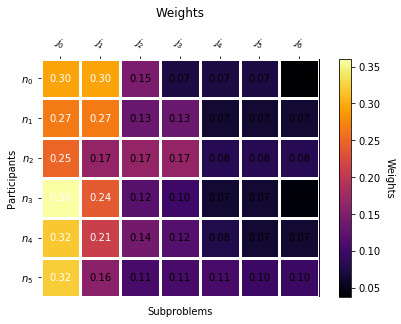

In [20]:
ax = result.plot.weight_heatmap(cmap="inferno")

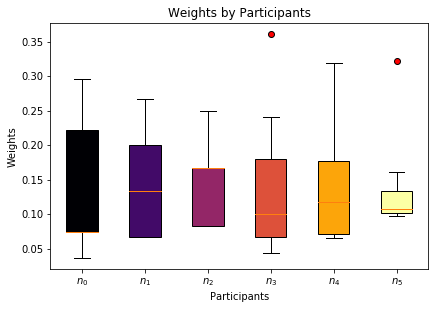

In [21]:
ax = result.plot.weights_by_participants(ptype="box", cmap="inferno")

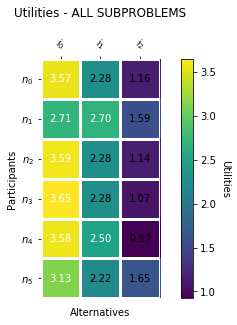

In [22]:
ax = result.plot.utilities_heatmap()

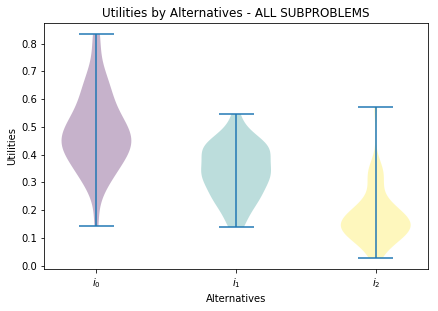

In [23]:
ax = result.plot.utilities_by_alternatives(subproblem=None, ptype="violin")

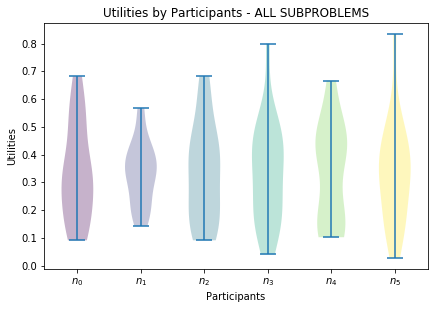

In [24]:
result.plot.utilities_by_participants(subproblem=None, ptype="violin")

## References

> Zanazzi, J. L., Gomes, L. F. A. M., & Dimitroff, M. (2014). Group decision
  making applied to preventive maintenance systems. Pesquisa Operacional,
  34(1), 91-105.

> Cabral, J. B., Luczywo, N. A., & Zanazzi, J. L. (2016). Scikit-Criteria:
  colección de métodos de análisis multi-criterio integrado al stack
  científico de Python. In XIV Simposio Argentino de Investigación Operativa
  (SIO 2016)-JAIIO 45 (Tres de Febrero, 2016).

In [ ]:
abc_c = [
            # MO
            np.array([
                [1.5, 3.0, 1.0],
                [1.0, 3.0, 1.0],
                [0.833, 3.6, 1.0],
                [1.1, 2.5, 1.0],
                [1.0, 3.0, 1.0],
                [1.2, 3.0, 1.0]]),

            # COSTO
            np.array([
                [1.1, 1.1, 1.0],
                [1.2, 1.5, 1.0],
                [1.1, 2.0, 1.0],
                [1.1, 1.2, 1.0],
                [1.2, 1.1, 1.0],
                [1.1, 1.5, 1.0]]),

            # EXP
            np.array([
                [1.1, 2.0, 1.0],
                [1.0, 1.5, 1.0],
                [1.1, 2.0, 1.0],
                [2.1, 2.0, 1.0],
                [1.5, 1.5, 1.0],
                [1.2, 3.0, 1.0]])] + abc[3:]